## Idea

Using the data made available by the NYC Government as Open Data, trying to obtain some insights and understand if data confirms the usual assumptions.

<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data_preparation](#data_preparation)
5. [A final note](#final_note)

## 0. Import packages <a id='imports'></a>
[Back to top](#table_of_contents)

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

## 1. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [5]:
data = pd.read_csv('data/Motor_Vehicle_Collisions_-_Crashes.csv',low_memory=False)

In [6]:
print(data.shape)
data.head()

(1736981, 29)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,12/04/2020,16:55,NaN,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE OUTER ROADWA,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4373202,Sedan,Sedan,NaN,NaN,NaN
1,12/04/2020,9:16,NaN,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,NaN,NaN,...,Unsafe Speed,NaN,NaN,NaN,4373670,Sedan,NaN,NaN,NaN,NaN
2,12/03/2020,13:37,NaN,NaN,40.798504,-73.967125,"(40.798504, -73.967125)",WEST 103 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4373072,NaN,NaN,NaN,NaN,NaN
3,12/03/2020,9:05,NaN,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,NaN,NaN,...,NaN,NaN,NaN,NaN,4372904,Sedan,NaN,NaN,NaN,NaN
4,12/02/2020,13:29,NaN,NaN,NaN,NaN,NaN,CHURCH AVENUE,OCEAN PARKWAY,NaN,...,NaN,NaN,NaN,NaN,4373367,Bus,NaN,NaN,NaN,NaN


## 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [7]:
data.isna().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           532467
ZIP CODE                          532677
LATITUDE                          206846
LONGITUDE                         206846
LOCATION                          206846
ON STREET NAME                    348229
CROSS STREET NAME                 605787
OFF STREET NAME                  1481120
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4819
CONTRIBUTING FACTOR VEHICLE 2     243174
CONTRIBUTING FACTOR VEHICLE 3    1621519
CONTRIBUTING FACTOR VEHICLE 4    1712319
CONTRIBUTING FACTOR VEHICLE 5    1730559
COLLISION_ID                           0
VEHICLE TYPE COD

columns that could be removed for lack of data points:

__'OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'__


In [8]:
data['COLLISION_ID'].nunique()

1736981

__'COLLISION_ID'__ could be removed because it doesn't add any value ot to the rest of the data

In [9]:
data.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

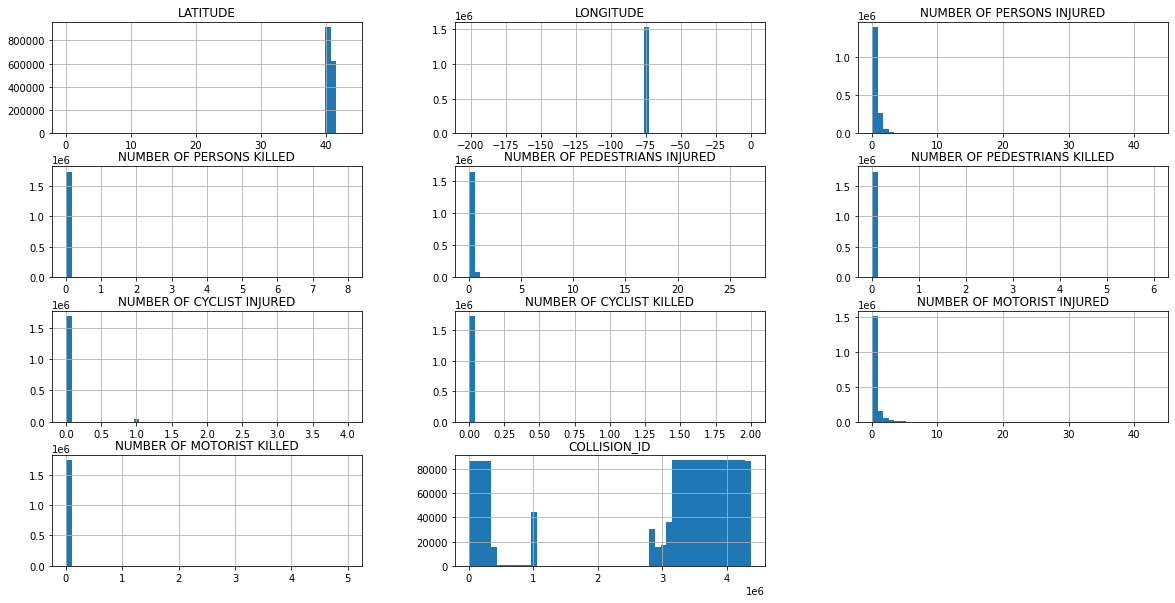

In [10]:
data.hist(figsize=(20,10),bins=50);

In [11]:
data['NUMBER OF PERSONS KILLED'].describe()

count    1.736950e+06
mean     1.241832e-03
std      3.728241e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.000000e+00
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [12]:
data[data['NUMBER OF PERSONS KILLED']==1].shape

(2008, 29)

In [13]:
data[data['NUMBER OF PERSONS KILLED']==2].shape

(50, 29)

In [14]:
data[data['NUMBER OF PEDESTRIANS KILLED']==1].shape

(1112, 29)

In [15]:
data[data['NUMBER OF PEDESTRIANS KILLED']==2].shape

(10, 29)

In [16]:
data[data['NUMBER OF MOTORIST KILLED']==1].shape

(741, 29)

In [17]:
data[data['NUMBER OF MOTORIST KILLED']==2].shape

(38, 29)

In [18]:
data[data['NUMBER OF CYCLIST KILLED']==1].shape

(161, 29)

In [19]:
data[data['NUMBER OF CYCLIST KILLED']==2].shape

(1, 29)

How many rows contain a number of person injured bigger than 2?

In [20]:
data[data['NUMBER OF PERSONS INJURED']>2].shape

(27506, 29)

maybe also these 27K rows could be removed

most of the contributing factors are _unspecified_

In [21]:
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[0:20]

Unspecified                       624121
Driver Inattention/Distraction    332243
Failure to Yield Right-of-Way      99925
Following Too Closely              89136
Backing Unsafely                   66240
Other Vehicular                    54931
Fatigued/Drowsy                    47003
Turning Improperly                 43576
Passing or Lane Usage Improper     42858
Passing Too Closely                39284
Unsafe Lane Changing               33844
Traffic Control Disregarded        27229
Driver Inexperience                25791
Lost Consciousness                 19836
Pavement Slippery                  17030
Alcohol Involvement                16944
Unsafe Speed                       16771
Reaction to Uninvolved Vehicle     15785
Prescription Medication            15363
Outside Car Distraction            12063
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

too many _vehicle type codes_

In [22]:
data['VEHICLE TYPE CODE 1'].value_counts()[0:20]

Sedan                                  418540
PASSENGER VEHICLE                      416206
Station Wagon/Sport Utility Vehicle    335582
SPORT UTILITY / STATION WAGON          180291
Taxi                                    42826
4 dr sedan                              39998
TAXI                                    31911
Pick-up Truck                           27429
VAN                                     25266
OTHER                                   22965
UNKNOWN                                 19924
Box Truck                               18687
Bus                                     15564
LARGE COM VEH(6 OR MORE TIRES)          14397
BUS                                     13993
SMALL COM VEH(4 TIRES)                  13216
PICK-UP TRUCK                           11505
LIVERY VEHICLE                          10481
Bike                                     9670
Tractor Truck Diesel                     7909
Name: VEHICLE TYPE CODE 1, dtype: int64

## 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

In [23]:
data_cleaning = data.copy()

removing columns which are not needed

In [24]:
data_cleaning.drop(columns=['OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4',
                                'CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4',
                                'VEHICLE TYPE CODE 5','CROSS STREET NAME','COLLISION_ID',
                           'ZIP CODE','CONTRIBUTING FACTOR VEHICLE 2','VEHICLE TYPE CODE 2'],inplace=True)

In [25]:
print(data_cleaning.shape)
data_cleaning.head(3)

(1736981, 17)


,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,12/04/2020,16:55,NaN,NaN,NaN,NaN,WILLIAMSBURG BRIDGE OUTER ROADWA,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Sedan
1,12/04/2020,9:16,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,0.0,0.0,0,0,0,0,0,0,Reaction to Uninvolved Vehicle,Sedan
2,12/03/2020,13:37,NaN,40.798504,-73.967125,"(40.798504, -73.967125)",WEST 103 STREET,1.0,0.0,1,0,0,0,0,0,NaN,NaN


filtering values where __LOCATION__ is not null

In [26]:
data_cleaning = data_cleaning[pd.notnull(data_cleaning['LOCATION'])]
data_cleaning.shape

(1530135, 17)

In [27]:
data_cleaning = data_cleaning.reset_index(drop=True)

filling missing values where missing with _ffill_ and _bfill_

In [28]:
data_cleaning['NUMBER OF PERSONS KILLED'] = data_cleaning['NUMBER OF PERSONS KILLED'].ffill()
data_cleaning['NUMBER OF PERSONS INJURED'] = data_cleaning['NUMBER OF PERSONS INJURED'].ffill()
data_cleaning['NUMBER OF PERSONS INJURED'] = data_cleaning['NUMBER OF PERSONS INJURED'].astype(int)

In [29]:
data_cleaning.isna().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          356759
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
ON STREET NAME                   295181
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      4322
VEHICLE TYPE CODE 1                8020
dtype: int64

In [30]:
data_cleaning.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
VEHICLE TYPE CODE 1               object
dtype: object

keeping only data points where the _NUMBER OF PERSONS INJURED_ is equal or below __2__

In [31]:
data_cleaning = data_cleaning[data_cleaning['NUMBER OF PERSONS INJURED']<=2]

In [32]:
data_cleaning.drop(columns=['LOCATION'],inplace=True)

In [33]:
data_cleaning.shape

(1506315, 16)

## 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [34]:
data_preparation = data_cleaning.copy()

In [35]:
# data_preparation['COLLISION_ID'] = data_preparation['COLLISION_ID'].astype(str)

lowering the string values, reducing the possible duplicates

In [36]:
data_preparation.loc[:,'CONTRIBUTING FACTOR VEHICLE 1'] = data_preparation.loc[:,'CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
data_preparation.loc[:,'VEHICLE TYPE CODE 1'] = data_preparation.loc[:,'VEHICLE TYPE CODE 1'].str.lower()

In [37]:
data_preparation.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1
0,12/03/2020,13:37,NaN,40.798504,-73.967125,WEST 103 STREET,1,0.0,1,0,0,0,0,0,NaN,NaN
1,12/02/2020,19:00,NaN,40.731167,-73.709940,256 STREET,0,0.0,0,0,0,0,0,0,unspecified,taxi
2,11/30/2020,9:40,QUEENS,40.735550,-73.850970,NaN,0,0.0,0,0,0,0,0,0,NaN,NaN
3,11/29/2020,5:45,NaN,40.701527,-73.989570,BROOKLYN QUEENS EXPRESSWAY,0,0.0,0,0,0,0,0,0,fell asleep,sedan
4,11/26/2020,23:30,NaN,40.700108,-73.953830,WALLABOUT STREET,1,0.0,0,0,0,0,1,0,driver inattention/distraction,sedan


creating a new time stamp column (takes a few minutes on my laptop)

In [38]:
data_preparation['CRASH_TIME'] = data_preparation['CRASH DATE']+' '+data_cleaning['CRASH TIME']
data_preparation.loc[:,'CRASH_TIME'] = pd.to_datetime(data_preparation.loc[:,'CRASH_TIME'])

In [39]:
data_preparation.drop(columns=['CRASH DATE','CRASH TIME'],inplace=True)

transforming the column _NUMBER OF PERSONS KILLED_ in integer, since the float value is not needed.

In [40]:
data_preparation.loc[:,'NUMBER OF PERSONS KILLED'] = data_preparation.loc[:,'NUMBER OF PERSONS KILLED'].astype(int)

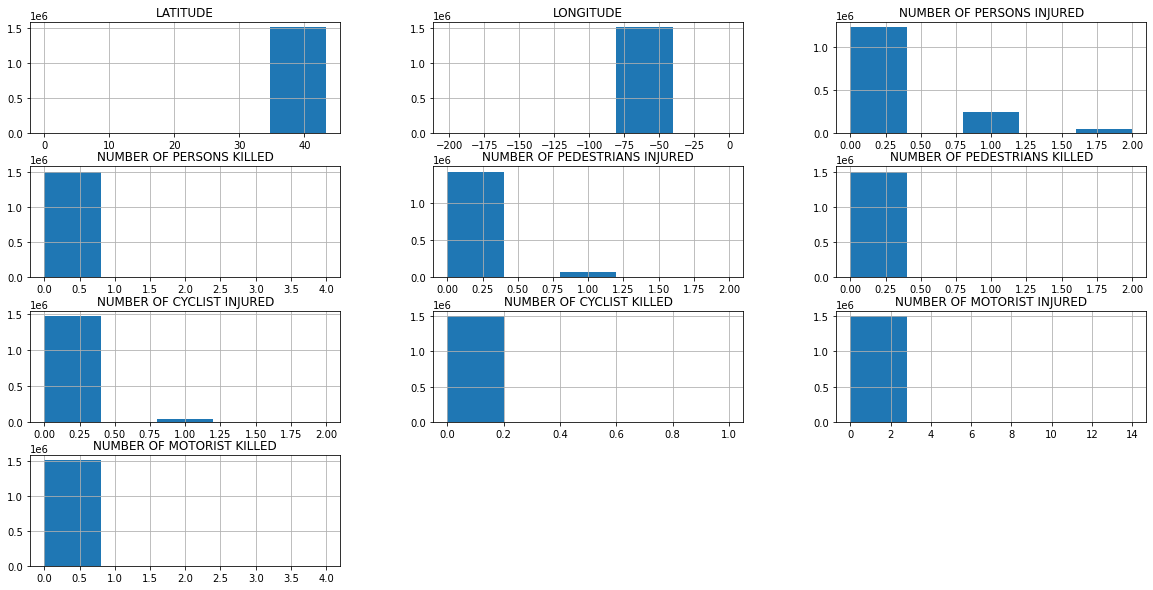

In [41]:
data_preparation.hist(figsize=(20,10), bins=5);

filling a few rows with backward and foreward values

In [42]:
data_preparation['VEHICLE TYPE CODE 1'] = data_preparation['VEHICLE TYPE CODE 1'].ffill().bfill()
data_preparation['CONTRIBUTING FACTOR VEHICLE 1'] = data_preparation['CONTRIBUTING FACTOR VEHICLE 1'].ffill().bfill()

In [43]:
data_preparation.isna().sum()

BOROUGH                          349168
LATITUDE                              0
LONGITUDE                             0
ON STREET NAME                   292135
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
VEHICLE TYPE CODE 1                   0
CRASH_TIME                            0
dtype: int64

In [44]:
# data_preparation[data_preparation['VEHICLE TYPE CODE 1'].str.len()==12]['VEHICLE TYPE CODE 1'].value_counts()

mapping the most recurring _INVOLVED_VEHICLE_ to a new columns

In [45]:
data_preparation['INVOLVED_VEHICLE'] = data_preparation['VEHICLE TYPE CODE 1']\
.map({'station wagon/sport utility vehicle':'SUV',
      'sport utility / station wagon':'SUV',
     'passenger vehicle':'sedan',
     '4 dr sedan':'sedan',
     '2 dr sedan':'sedan',
     'convertible':'sedan',
     'pick-up truck':'truck',
     'tractor truck diesel':'truck',
     'tractor truck gasoline':'truck',
     'box truck':'truck',
     'dump':'truck',
     'flat bed':'truck',
     'ambulance':'truck',
     'ambul':'truck',
     'taxi':'taxi',
     'bus':'bus',
     'livery vehicle':'truck',
     'small com veh(4 tires)':'truck',
     'large com veh(6 or more tires)':'truck',
     'carry all':'truck',
     'van':'truck',
     'fire':'truck',
     'tanker':'truck',
     'bike':'bike',
     'bicycle':'bike',
     'motorcycle':'motorcycle',
     'motorbike':'motorcycle'
     })
data_preparation['INVOLVED_VEHICLE'].fillna('other',inplace=True)

In [46]:
data_preparation['INVOLVED_VEHICLE'].value_counts()

SUV           452688
other         446673
sedan         374879
truck         119779
taxi           68276
bus            26227
bike            9166
motorcycle      8627
Name: INVOLVED_VEHICLE, dtype: int64

mapping the most recurring FACTORS or aggregating them

In [47]:
data_preparation['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[0:5]

unspecified                       540471
driver inattention/distraction    293784
failure to yield right-of-way      88939
following too closely              75671
backing unsafely                   60231
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [48]:
data_preparation['CAUSE'] = data_preparation['CONTRIBUTING FACTOR VEHICLE 1']\
.map({
    'oversized vehicle':'other vehicular',
    'outside car distraction':'other vehicular',
    'view obstructed/limited':'other vehicular',
    'passenger distraction':'driver inattention/distraction',
    'aggressive driving/road rage':'driver inattention/distraction',
    'pedestrian/bicyclist/other pedestrian error/confusion':'other vehicular',
    'brakes defective':'other vehicular',
    'fell asleep':'driver inattention/distraction',
    'obstruction/debris':'other vehicular',
    'glare':'other vehicular',
    'failure to keep right':'driver inattention/distraction',
    'other electronic device':'other vehicular',
    'illness':'physical disability',
    'steering failure':'other vehicular',
    'pavement defective':'other vehicular',
    'tire failure/inadequate':'other vehicular',
    'reaction to other uninvolved vehicle':'other vehicular',
    'animals action':'other vehicular',
    'illnes':'driver inattention/distraction',
    'drugs (illegal)':'driver inattention/distraction',
    'driverless/runaway vehicle':'driver inattention/distraction',
    'lane marking improper/inadequate':'other vehicular',
    'accelerator defective':'other vehicular',
    'traffic control device improper/non-working':'other vehicular',
    'cell phone (hand-held)':'driver inattention/distraction',
    'cell phone (hands-free)':'driver inattention/distraction',
    'tow hitch defective':'other vehicular',
    'other lighting defects':'other vehicular',
    'using on board navigation device':'driver inattention/distraction',
    'headlights defective':'other vehicular',
    'vehicle vandalism':'other vehicular',
    'eating or drinking':'driver inattention/distraction',
    'tinted windows':'driver inattention/distraction',
    'shoulders defective/improper':'driver inattention/distraction',
    'windshield inadequate':'other vehicular',
    '80':'other',
    'texting':'driver inattention/distraction',
    'listening/using headphones':'driver inattention/distraction',
    '1':'other'
    }).fillna(data_preparation['CONTRIBUTING FACTOR VEHICLE 1'])
data_preparation['CAUSE'] = data_preparation['CAUSE'].replace('unspecified',np.nan)

In [49]:
data_preparation['CAUSE'].value_counts()

driver inattention/distraction    316189
other vehicular                   105657
failure to yield right-of-way      88939
following too closely              75671
backing unsafely                   60231
passing or lane usage improper     38485
turning improperly                 36903
fatigued/drowsy                    36849
passing too closely                36802
unsafe lane changing               29038
traffic control disregarded        22733
driver inexperience                22650
lost consciousness                 16744
alcohol involvement                14491
pavement slippery                  14322
unsafe speed                       14157
reaction to uninvolved vehicle     13683
prescription medication            12861
physical disability                 9372
other                                 67
Name: CAUSE, dtype: int64

In [50]:
data_preparation['CAUSE'] = data_preparation['CAUSE'].ffill().bfill()

In [51]:
data_preparation.isna().sum()

BOROUGH                          349168
LATITUDE                              0
LONGITUDE                             0
ON STREET NAME                   292135
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
VEHICLE TYPE CODE 1                   0
CRASH_TIME                            0
INVOLVED_VEHICLE                      0
CAUSE                                 0
dtype: int64

In [52]:
data_preparation.head(10)

,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,CRASH_TIME,INVOLVED_VEHICLE,CAUSE
0,NaN,40.798504,-73.967125,WEST 103 STREET,1,0,1,0,0,0,0,0,unspecified,taxi,2020-12-03 13:37:00,taxi,driver inattention/distraction
1,NaN,40.731167,-73.709940,256 STREET,0,0,0,0,0,0,0,0,unspecified,taxi,2020-12-02 19:00:00,taxi,driver inattention/distraction
2,QUEENS,40.735550,-73.850970,NaN,0,0,0,0,0,0,0,0,unspecified,taxi,2020-11-30 09:40:00,taxi,driver inattention/distraction
3,NaN,40.701527,-73.989570,BROOKLYN QUEENS EXPRESSWAY,0,0,0,0,0,0,0,0,fell asleep,sedan,2020-11-29 05:45:00,other,driver inattention/distraction
4,NaN,40.700108,-73.953830,WALLABOUT STREET,1,0,0,0,0,0,1,0,driver inattention/distraction,sedan,2020-11-26 23:30:00,other,driver inattention/distraction
5,BROOKLYN,40.668293,-73.979240,NaN,1,0,0,0,0,0,1,0,driver inattention/distraction,sedan,2020-11-23 11:28:00,other,driver inattention/distraction
6,NaN,40.624640,-74.141670,FOREST AVENUE,1,0,1,0,0,0,0,0,driver inattention/distraction,sedan,2020-11-22 20:10:00,other,driver inattention/distraction
7,NaN,40.677483,-73.930330,UTICA AVENUE,1,0,0,0,1,0,0,0,other vehicular,taxi,2020-11-20 12:00:00,taxi,other vehicular
8,MANHATTAN,40.736706,-73.978220,NaN,1,0,1,0,0,0,0,0,turning improperly,taxi,2020-11-18 11:00:00,taxi,turning improperly
9,NaN,40.608757,-74.038086,VERRAZANO BRIDGE LOWER,0,0,0,0,0,0,0,0,unspecified,sedan,2017-01-17 03:02:00,other,turning improperly


---

__Attempt to fix missing geo data__

In [53]:
geolocator = Nominatim(user_agent='coll_nyc')

In [54]:
geodata = data_preparation[['BOROUGH','LATITUDE','LONGITUDE','ON STREET NAME']].copy()
print(geodata.shape)
geodata.head(3)

(1506315, 4)


,BOROUGH,LATITUDE,LONGITUDE,ON STREET NAME
0,NaN,40.798504,-73.967125,WEST 103 STREET
1,NaN,40.731167,-73.709940,256 STREET
2,QUEENS,40.735550,-73.850970,NaN


In [55]:
# missing_street = geodata[geodata['ON STREET NAME'].isnull()][['COLLISION_ID','BOROUGH','LATITUDE','LONGITUDE']]
# missing_borough = geodata[geodata['BOROUGH'].isnull()][['COLLISION_ID','ON STREET NAME','LATITUDE','LONGITUDE']]

missing_street = geodata[geodata['ON STREET NAME'].isnull()][['LATITUDE','LONGITUDE']]
missing_borough = geodata[geodata['BOROUGH'].isnull()][['LATITUDE','LONGITUDE']]

full_geodata = geodata.dropna()

In [56]:
missing_geodata = missing_street.append(missing_borough)

In [57]:
missing_geodata = missing_geodata.drop_duplicates().reset_index(drop=True)

In [58]:
missing_geodata.shape

(175627, 2)

#### Plotting a technique to extract the missing values using Nominatim

In [59]:
test = missing_geodata[0:100].copy()

In [60]:
def get_road(x):
    location = geolocator.reverse((x['LATITUDE'],x['LONGITUDE']), exactly_one=True)
    address = location.raw['address']
    road = address.get('road', '')
    return road.upper()

In [61]:
def get_suburb(x):
    location = geolocator.reverse((x['LATITUDE'],x['LONGITUDE']), exactly_one=True)
    address = location.raw['address']
    road = address.get('suburb', '')
    return road.upper()

In [62]:
def get_address(x):
    location = geolocator.reverse((x['LATITUDE'],x['LONGITUDE']), exactly_one=True)
    address = location.raw['address']
    road = address.get('road', '')
    sub = address.get('suburb', '')
    return ", ".join([road.upper(), sub.upper()])

In [63]:
%%time
test.loc[:,'data'] = test.apply(get_address,axis=1)

CPU times: user 256 ms, sys: 47.6 ms, total: 304 ms
Wall time: 50.7 s


After this few tests I decided to drop the rows related to the missing values for the following reasons:

- the _missing_geodata_ dataset contains over 175K records
- a test for 100 rows takes 50 seconds to gather the missing data
- putting these results in proportions means that it would take roughly 24 hours of calls which is not sustainable

In [64]:
data_preparation = data_preparation.drop(columns=['LATITUDE','LONGITUDE'])

#### Sad decision: dropping rows with missing Borough or Road or both

In [104]:
data_without_na = data_preparation.dropna().copy()
print(data_without_na.shape)

(938339, 15)


In [105]:
data_without_na.isna().sum()

BOROUGH                          0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
VEHICLE TYPE CODE 1              0
CRASH_TIME                       0
INVOLVED_VEHICLE                 0
CAUSE                            0
dtype: int64

Now the dataset looks ready for the next steps.

In [106]:
data_without_na.head(3)

,BOROUGH,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,CRASH_TIME,INVOLVED_VEHICLE,CAUSE
12,BRONX,WEST 231 STREET,1,0,1,0,0,0,0,0,unspecified,box truck,2020-11-18 09:37:00,truck,other vehicular
14,BROOKLYN,MANHATTAN AVENUE,0,0,0,0,0,0,0,0,unspecified,motorcycle,2020-11-09 11:50:00,motorcycle,driver inattention/distraction
16,QUEENS,222 STREET,0,0,0,0,0,0,0,0,unspecified,sedan,2020-11-09 09:45:00,other,following too closely


Adding some features related to time.

In [107]:
data_without_na.loc[:,'collision_month'] = data_without_na['CRASH_TIME'].dt.month
data_without_na.loc[:,'collision_day'] = data_without_na['CRASH_TIME'].dt.day
data_without_na.loc[:,'collision_hour'] = data_without_na['CRASH_TIME'].dt.hour
data_without_na.loc[:,'collision_weekday'] = data_without_na['CRASH_TIME'].dt.weekday
# data_without_na['collision_weekend'] = data_without_na['collision_weekday'].apply(lambda x: 0 if x == 5 or x == 6 else 1)

In [108]:
data_without_na.loc[:,'collision_month'] = data_without_na.loc[:,'collision_month'].astype(str)
data_without_na.loc[:,'collision_day'] = data_without_na.loc[:,'collision_day'].astype(str)
data_without_na.loc[:,'collision_hour'] = data_without_na.loc[:,'collision_hour'].astype(str)
data_without_na.loc[:,'collision_weekday'] = data_without_na.loc[:,'collision_weekday'].astype(str)
# data_without_na['collision_weekend'] = data_without_na['collision_weekend'].astype(str)

In [109]:
data_without_na.dtypes

BOROUGH                                  object
ON STREET NAME                           object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
VEHICLE TYPE CODE 1                      object
CRASH_TIME                       datetime64[ns]
INVOLVED_VEHICLE                         object
CAUSE                                    object
collision_month                          object
collision_day                            object
collision_hour                           object
collision_weekday                        object
dtype: object

In [110]:
data_without_na.rename(columns={'CONTRIBUTING FACTOR VEHICLE 1':'FACTOR',
                                'VEHICLE TYPE CODE 1':'VEHICLE_TYPE',
                                'ON STREET NAME':'STREET_NAME'},inplace=True)

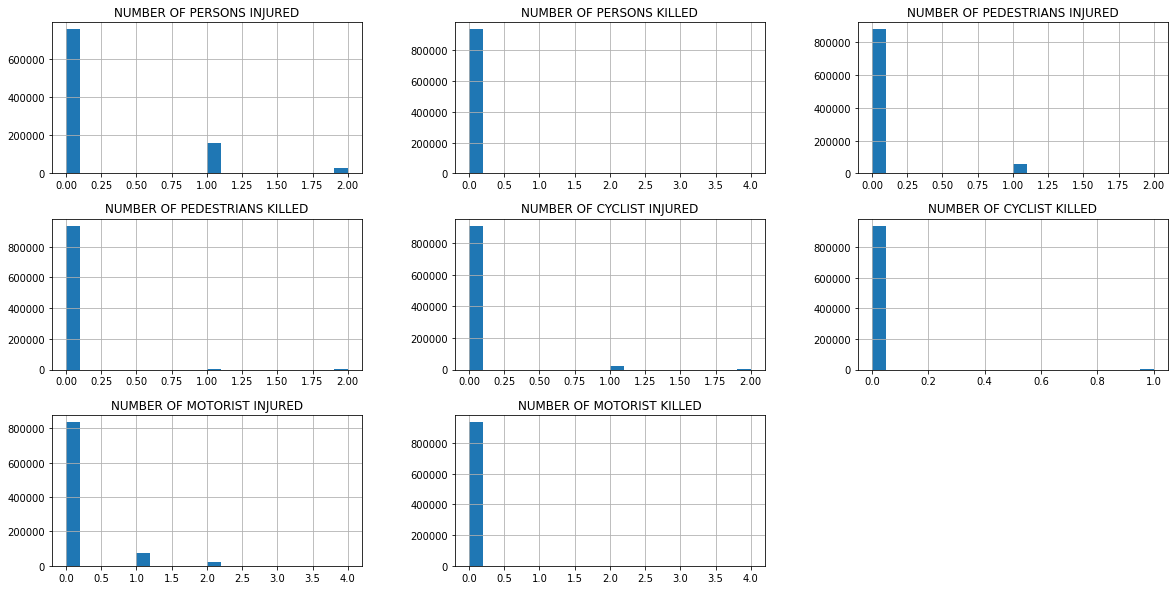

In [111]:
data_without_na.hist(figsize=(20,10),bins=20);

Merging _INJURED_ and _KILLED_ columns in order to add clarity

In [112]:
data_without_na['KILLED'] = \
data_without_na['NUMBER OF PERSONS KILLED'] + \
data_without_na['NUMBER OF PEDESTRIANS KILLED'] + \
data_without_na['NUMBER OF CYCLIST KILLED'] + \
data_without_na['NUMBER OF MOTORIST KILLED']

In [113]:
data_without_na['INJURED'] = \
data_without_na['NUMBER OF PERSONS INJURED'] + \
data_without_na['NUMBER OF PEDESTRIANS INJURED'] + \
data_without_na['NUMBER OF CYCLIST INJURED'] + \
data_without_na['NUMBER OF MOTORIST INJURED']

In [114]:
data_without_na = data_without_na.drop(columns=[
    'NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED'
])

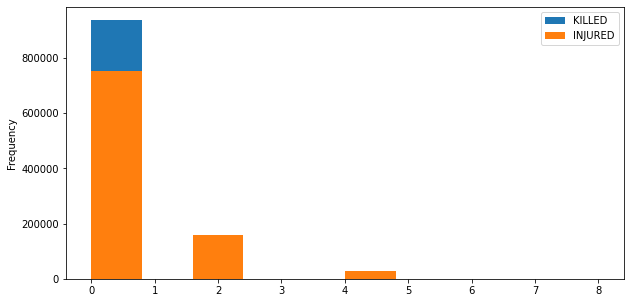

In [115]:
data_without_na.reset_index().plot(kind='hist',y=['KILLED','INJURED'], x='index',figsize=(10,5));

In [116]:
print(data_without_na.shape)
data_without_na.dtypes

(938339, 13)


BOROUGH                      object
STREET_NAME                  object
FACTOR                       object
VEHICLE_TYPE                 object
CRASH_TIME           datetime64[ns]
INVOLVED_VEHICLE             object
CAUSE                        object
collision_month              object
collision_day                object
collision_hour               object
collision_weekday            object
KILLED                        int64
INJURED                       int64
dtype: object

Dropping CRASH_TIME column

In [117]:
data_without_na = data_without_na.drop(columns='CRASH_TIME')

In [118]:
categorical_columns = ['BOROUGH',
                       'STREET_NAME',
                       'FACTOR',
                       'VEHICLE_TYPE',
                       'INVOLVED_VEHICLE',
                       'CAUSE',
#                        'collision_month',
#                        'collision_day',
#                        'collision_hour',
#                        'collision_weekday',
#                        'collision_weekend'
                      ]

numerical_columns = ['INJURED',
                     'KILLED'
                    ]

In [120]:
for col in categorical_columns:
    data_without_na[col] = data_without_na[col].astype('category')

In [122]:
for col in [
    'collision_month',
    'collision_day',
    'collision_hour',
    'collision_weekday'
]:
    data_without_na[col] = data_without_na[col].astype('int')

In [123]:
data_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938339 entries, 12 to 1530134
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   BOROUGH            938339 non-null  category
 1   STREET_NAME        938339 non-null  category
 2   FACTOR             938339 non-null  category
 3   VEHICLE_TYPE       938339 non-null  category
 4   INVOLVED_VEHICLE   938339 non-null  category
 5   CAUSE              938339 non-null  category
 6   collision_month    938339 non-null  int64   
 7   collision_day      938339 non-null  int64   
 8   collision_hour     938339 non-null  int64   
 9   collision_weekday  938339 non-null  int64   
 10  KILLED             938339 non-null  int64   
 11  INJURED            938339 non-null  int64   
dtypes: category(6), int64(6)
memory usage: 57.7 MB


## A "final" note <a id='final_note'></a>
[Back to top](#table_of_contents)

At this point, with a slightly different dataset I wanted to build a prediction model but my local Linux virtual machine proved a bit too limited causing the notebook kernel death after several attempts.

I decided to plot the reworked data to see if common assumptions are correct... and they are, indeed!

_NOTE: below data related to all 2020_

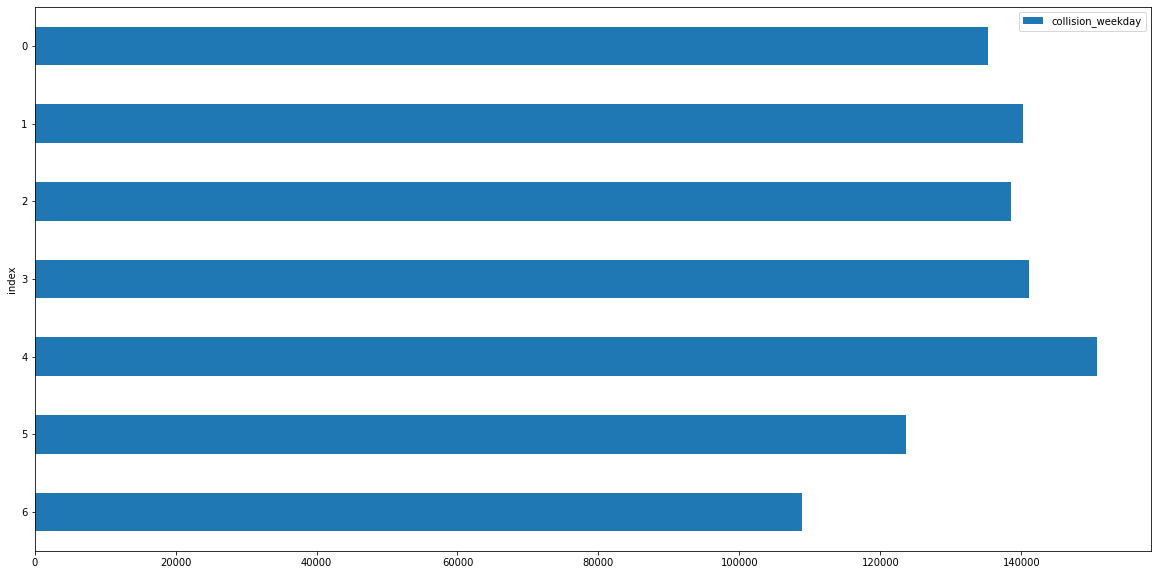

In [134]:
pd.DataFrame(data_without_na.collision_weekday.value_counts()).reset_index().sort_values('index',ascending=False)\
.plot(y='collision_weekday',x='index',kind='barh',figsize=(20,10));

_Friday (4) is indeed the most the dangerous day, followed by Thursday (3) and Tuesday (1)._

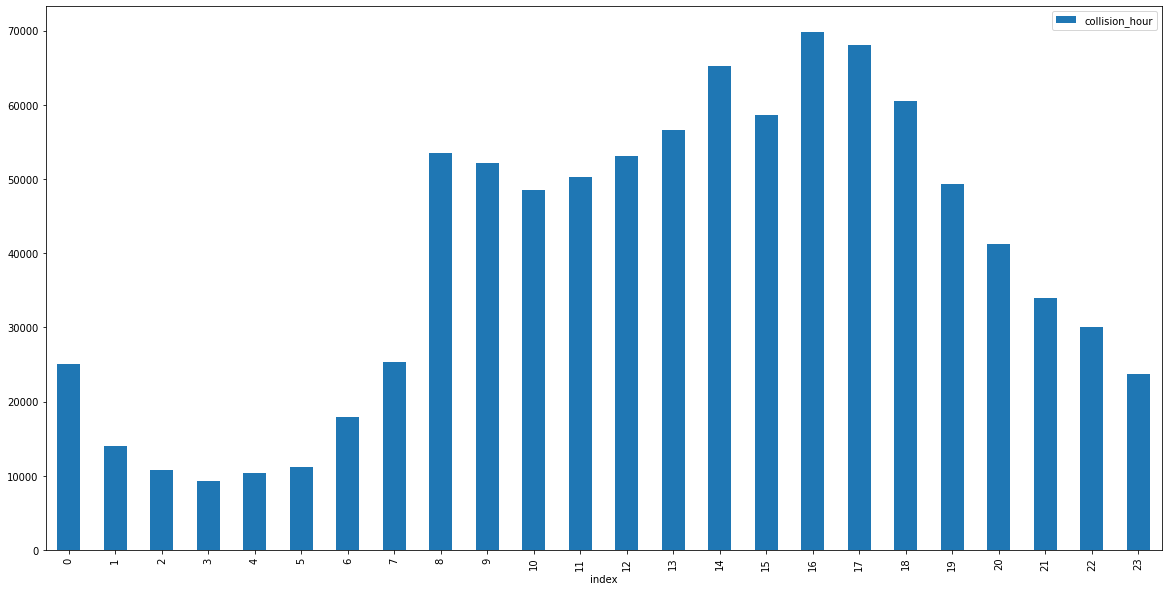

In [125]:
pd.DataFrame(data_without_na.collision_hour.value_counts()).reset_index().sort_values('index')\
.plot(y='collision_hour',x='index',kind='bar',figsize=(20,10));

_Indeed, between 8 and 9 AM, and again between 4 and 5 PM a lot of collisions take place._

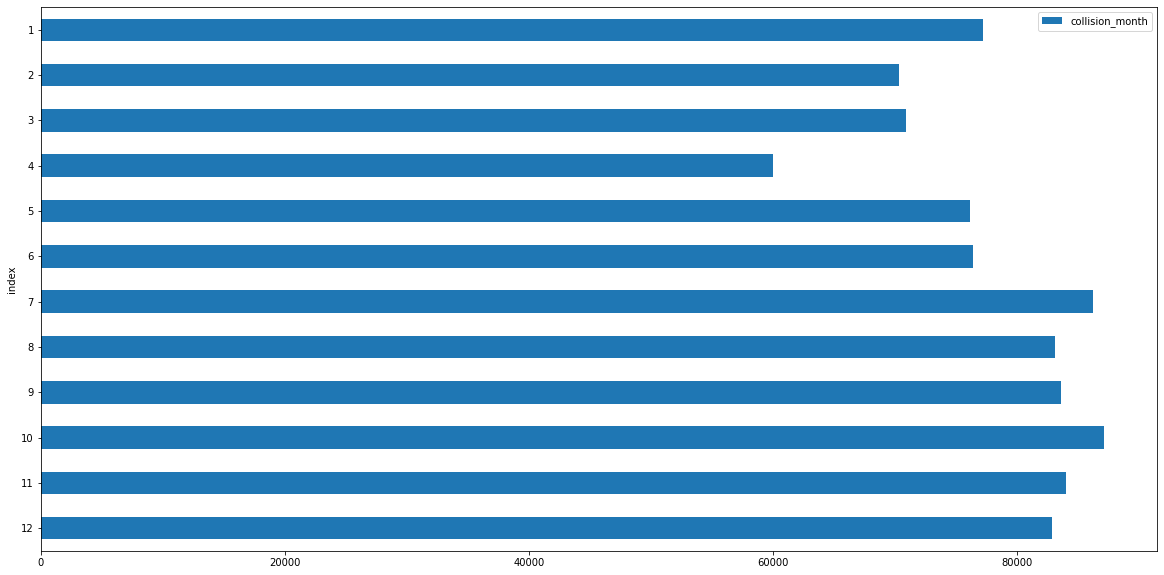

In [136]:
pd.DataFrame(data_without_na.collision_month.value_counts()).reset_index().sort_values('index',ascending=False)\
.plot(y='collision_month',x='index',kind='barh',figsize=(20,10));

_The craziest months are July (7) and October (10), in general the 2H of the year seems to be the busiest._

#### _Below I am evaluating a subset of the data, only those datapoints where 1 or more persons were killed._

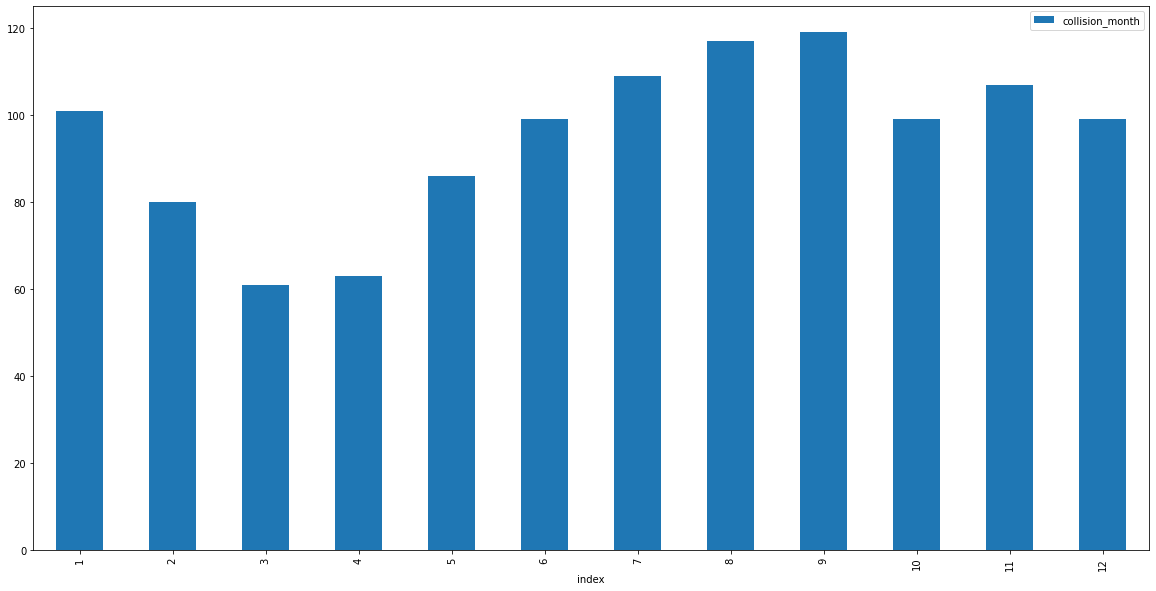

In [127]:
pd.DataFrame(data_without_na[data_without_na.KILLED>=1].collision_month.value_counts()).reset_index().sort_values('index')\
.plot(y='collision_month',x='index',kind='bar',figsize=(20,10));

_July (7), August (8) and September (9) seem to be the deadliest months of the year._

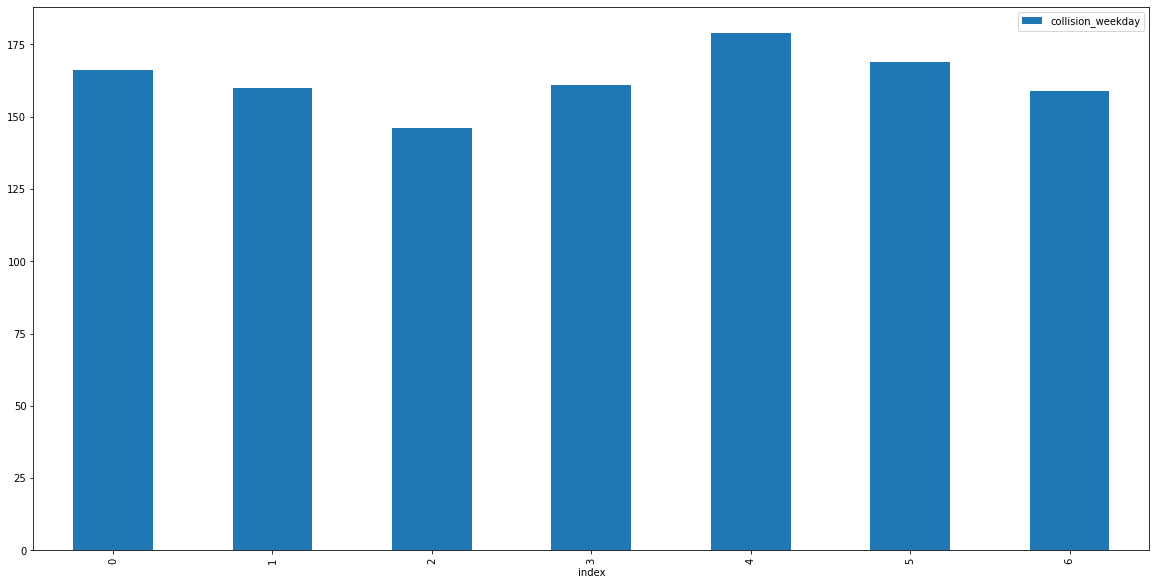

In [128]:
pd.DataFrame(data_without_na[data_without_na.KILLED>=1].collision_weekday.value_counts()).reset_index().sort_values('index')\
.plot(y='collision_weekday',x='index',kind='bar',figsize=(20,10));

_Friday (4) is the most dangerous._

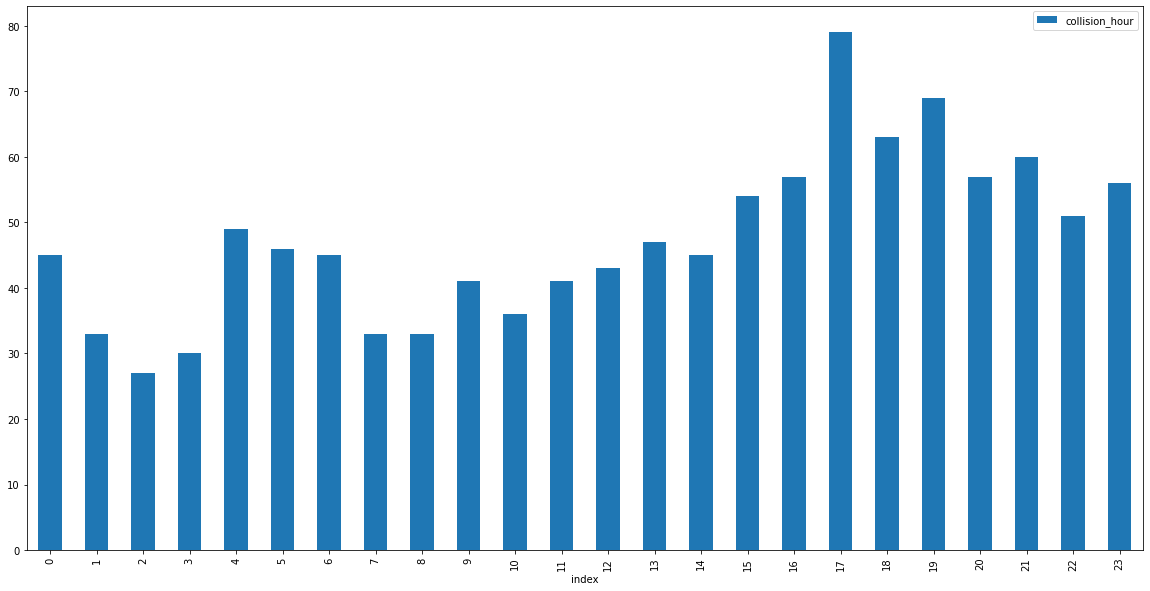

In [139]:
pd.DataFrame(data_without_na[data_without_na.KILLED>=1].collision_hour.value_counts())\
.reset_index()\
.sort_values('index')\
.plot(y='collision_hour',x='index',kind='bar',figsize=(20,10));

_More chances of being involved in a deadly collision around 5 PM, and later in the evening._